In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline
from sklearn import svm  


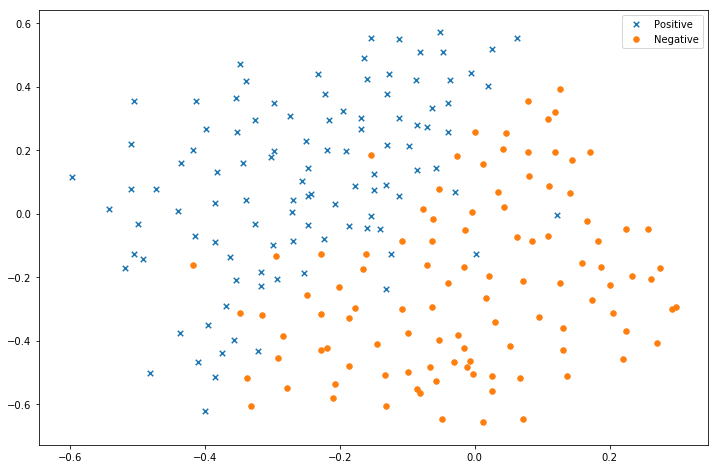

In [14]:
raw_data = loadmat('data3.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()  

In [16]:
raw_data = loadmat('data3.mat')

X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0  
best_params = {'C': None, 'gamma': None}

for C in C_values:
    current_score=0
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        current_score=score
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
    
    print('C: '+ str(C))
    print('score:' + str(current_score))
    print('--------------------------------------------------')

best_score, best_params  

C: 0.01
score:0.435
--------------------------------------------------
C: 0.03
score:0.435
--------------------------------------------------
C: 0.1
score:0.86
--------------------------------------------------
C: 0.3
score:0.965
--------------------------------------------------
C: 1
score:0.965
--------------------------------------------------
C: 3
score:0.945
--------------------------------------------------
C: 10
score:0.945
--------------------------------------------------
C: 30
score:0.92
--------------------------------------------------
C: 100
score:0.88
--------------------------------------------------


(0.96499999999999997, {'C': 0.3, 'gamma': 100})